In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time
import timeit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from nltk.corpus import stopwords
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from matplotlib.colors import ListedColormap
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

In [72]:
pd.set_option('display.max_columns',120)

In [249]:
pd.set_option('display.max_rows',1000)

In [325]:
df = pd.read_csv('spotifydata.csv')

In [330]:
df.time_signature.value_counts()

4.0    6635
3.0     412
5.0      81
1.0      35
0.0       4
Name: time_signature, dtype: int64

In [10]:
df.corr()

danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.057239 -0.068057  0.052759 -0.071724   
energy               -0.057239  1.000000  0.049560  0.709141 -0.078994   
key                  -0.068057  0.049560  1.000000 -0.053684 -0.164038   
loudness              0.052759  0.709141 -0.053684  1.000000 -0.090640   
mode                 -0.071724 -0.078994 -0.164038 -0.090640  1.000000   
speechiness           0.111775 -0.206672  0.070721 -0.443359  0.016506   
acousticness          0.039398 -0.253051  0.021402 -0.153320  0.066332   
instrumentalness     -0.019826  0.101128 -0.062148 -0.057377  0.053900   
liveness             -0.042014  0.147744 -0.012909  0.060033 -0.000182   
valence               0.423435  0.321781 -0.023195  0.407731 -0.023205   
tempo                -0.364492  0.032676  0.005246 -0.136692  0.100207   
duration_ms           0.006038 -0.090013  0.006513 -0.143251  0.114663   
time_signature        0.078996  0.154330 -0.065778  0.036958 -0.085525   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.111775      0.039398         -0.019826 -0.042014   
energy              -0.206672     -0.253051          0.101128  0.147744   
key                  0.070721      0.021402         -0.062148 -0.012909   
loudness            -0.443359     -0.153320         -0.057377  0.060033   
mode                 0.016506      0.066332          0.053900 -0.000182   
speechiness          1.000000     -0.061942         -0.081229 -0.019815   
acousticness        -0.061942      1.000000         -0.074258 -0.135417   
instrumentalness    -0.081229     -0.074258          1.000000 -0.040742   
liveness            -0.019815     -0.135417         -0.040742  1.000000   
valence             -0.111576      0.127241         -0.061523 -0.000645   
tempo                0.172082     -0.253404          0.148184  0.049356   
duration_ms         -0.011580      0.038362         -0.033085 -0.046741   
time_signature       0.085775      0.002003          0.018606  0.057027   

                   valence     tempo  duration_ms  time_signature  
danceability      0.423435 -0.364492     0.006038        0.078996  
energy            0.321781  0.032676    -0.090013        0.154330  
key              -0.023195  0.005246     0.006513       -0.065778  
loudness          0.407731 -0.136692    -0.143251        0.036958  
mode             -0.023205  0.100207     0.114663       -0.085525  
speechiness      -0.111576  0.172082    -0.011580        0.085775  
acousticness      0.127241 -0.253404     0.038362        0.002003  
instrumentalness -0.061523  0.148184    -0.033085        0.018606  
liveness         -0.000645  0.049356    -0.046741        0.057027  
valence           1.000000 -0.291877    -0.120407        0.162900  
tempo            -0.291877  1.000000    -0.022200        0.087277  
duration_ms      -0.120407 -0.022200     1.000000       -0.138405  
time_signature    0.162900  0.087277    -0.138405        1.000000

In [80]:
df.columns


Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [331]:
df['name'] = df['name'].str.lower()

In [332]:
df['name'] = df['name'].str.replace("@|\.|\+|<br>|<br />|/|\'|\"|\\|(|)|<p>|\\n|<|>|\?|#|[|]|%|\$|&|;|!|:|-|_|=|}|{|,",'')

In [333]:
df['name'] = df['name'].str.replace("(",'')
df['name'] = df['name'].str.replace(")",'')

In [334]:
pos_words_sep = pd.Series(' '.join(df['name']).lower().split()).value_counts()[:]
pos_words_sep = pos_words_sep.to_frame().reset_index()
pos_words_sep.columns = ['word','pos_count']
pos_words_sep

word  pos_count
0                   the        969
1                   you        585
2                     i        411
3            remastered        411
4                  love        407
5                    me        369
6                     a        336
7               version        325
8                    in        324
9                    of        312
10                   to        307
11                 feat        280
12                   my        277
13                   it        228
14                   on        215
15                  for        174
16                 dont        151
17                  all        150
18                remix        149
19                  and        138
20                   be        131
21                 with        130
22                   is        125
23                 your        120
24                  one        115
25            christmas        105
26                 like        101
27                 from         98
28                   no         97
29                 time         95
30                   do         94
31               single         92
32                 live         91
33                night         89
34                 edit         86
35                 what         85
36                  way         84
37                   up         83
38                   im         77
39                radio         76
40                 that         76
41                   we         74
42                 this         74
43                heart         72
44                 want         72
45                   go         71
46                  get         70
47                 down         70
48                 song         70
49                  mix         68
50                  man         68
51                 good         67
52                 back         64
53                  let         64
54               little         62
55                  got         61
56                   at         61
57                 baby         61
58                 know         61
59                 girl         60
60                 life         59
61                 cant         56
62                 home         56
63             remaster         55
64                 have         53
65                 more         53
66                  are         53
67                 2015         53
68                  out         52
69                  its         52
70                world         52
71                 just         50
72                 when         50
73                 kiss         49
74                  bad         49
75                  who         48
76                  now         48
77                  day         48
78                 rock         48
79                never         47
80                 will         46
81                   if         46
82           soundtrack         46
83                youre         46
84                 come         45
85                woman         45
86                   so         44
87                dance         43
88                 make         43
89                 best         42
90                young         41
91                 fire         40
92             original         40
93                 blue         39
94                 take         39
95                  say         39
96                black         39
97                 last         38
98                  new         37
99                 feel         36
100                long         36
101               girls         35
102               wanna         35
103               again         34
104               gonna         34
105               where         33
106                  la         33
107             tonight         33
108                  as         33
109                   u         33
110               white         32
111               right         31
112                 can         30
113               every      

In [335]:
artists = pd.Series(' '.join(df['artists']).lower().split()).value_counts()[:]
artists = artists.to_frame().reset_index()
artists.columns = ['word','pos_count']
artists.word[0:9]

0        the
1       boys
2    jackson
3    michael
4     taylor
5     johnny
6     george
7        bob
8      barry
Name: word, dtype: object

In [446]:
def raterBin(x):
    if x >=.7:
        return int(1)
    if x < .7:
        return int(0)

In [447]:
df['danceBin'] = df['danceability'].apply(raterBin)

In [338]:
words = []
stopWords = set(stopwords.words('english'))
for w in pos_words_sep.word:
    if w not in stopWords and w != 'fit':
        words.append(w)
        
pos_words_final = pos_words_sep[pos_words_sep['word'].isin(words)]

In [339]:
for key in artists.word[0:9]:
    #print(key)
    df[str(key)] = df.name.str.contains(str(key), case=False)

In [215]:
for key in pos_words_final.word[:10]:
    #print(key)
    df[str(key)] = df.name.str.contains(str(key), case=False)

In [317]:
df['instrumlive'] = df['instrumentalness'] * df['liveness']

In [434]:
y = df['danceBin']
X = df[['energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [435]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'speechiness', 'tempo', 'time_signature', 'type', 'uri', 'valence',
       'danceBin', 'the', 'boys', 'jackson', 'michael', 'taylor', 'johnny',
       'george', 'bob', 'barry'],
      dtype='object')

In [448]:
df.danceBin.value_counts()

0    5319
1    1848
Name: danceBin, dtype: int64

In [437]:
knn_class = sklearn.neighbors.KNeighborsClassifier(n_neighbors=15)
%time knn_class.fit(X_train, y_train)

%time knn_class.predict(X_test)

%time knn_class.score(X_test, y_test)

Wall time: 9.51 ms
Wall time: 14.5 ms
Wall time: 15 ms


0.53417015341701535

In [389]:
confusion_matrix(y_test,knn_class.predict(X_test))

array([[1566,   28],
       [ 542,   15]])

In [421]:
knn_f1 = sklearn.metrics.f1_score(y_test, knn_class.predict(X_test) )
knn_f1

0.049999999999999996

In [401]:
#sklearn.metrics.precision_score(y_test, knn_class.predict(X_test))
sklearn.metrics.recall_score(y_test, knn_class.predict(X_test))

0.026929982046678635

In [131]:
X_float = df[['energy',  'tempo']]
X_float

energy    tempo
0     0.6520   95.977
1     0.8150   88.931
2     0.7860  177.833
3     0.6350  103.019
4     0.6680   80.924
5     0.6110  150.020
6     0.5330   99.968
7     0.7690   97.985
8     0.5600  134.066
9     0.4510  117.973
10    0.7500  155.096
11    0.6580   99.990
12    0.6340  102.013
13    0.6260  100.041
14    0.4340  150.062
15    0.8120  123.071
16    0.8170   98.064
17    0.8340  135.007
18    0.7630  101.965
19    0.7870  124.982
20    0.6770  103.809
21    0.8100  167.880
22    0.5570   85.043
23    0.8000  121.996
24    0.8040  104.823
25    0.4270  113.804
26    0.8760   99.943
27    0.5400  137.972
28    0.5240   95.010
29    0.6290  122.863
30    0.8130   92.994
31    0.5940  186.054
32    0.6720   97.980
33    0.7950  104.066
34    0.6960  116.054
35    0.5720  100.015
36    0.4630  111.980
37    0.5220  159.772
38    0.4850  106.028
39    0.6500  144.937
40    0.4480   95.050
41    0.8430  105.003
42    0.7450  101.018
43    0.7930  104.027
44    0.7890   93.973
45    0.6530   75.016
46    0.4490   80.126
47    0.7730  102.034
48    0.6650  127.076
49    0.5170  104.992
50    0.8360  114.965
51    0.4880  133.987
52    0.7180  199.864
53    0.7430  123.074
54    0.6190  103.989
55    0.8230   91.048
56    0.8680  121.030
57    0.6330  144.021
58    0.3590  160.083
59    0.8030  106.970
60    0.5140  139.931
61    0.6910  179.910
62    0.6690  124.007
63    0.8010  189.798
64    0.6670  112.956
65    0.6170  100.048
66    0.5550  179.666
67    0.4180   85.909
68    0.8640   92.028
69    0.5670   81.477
70    0.5950  119.972
71    0.7280  130.049
72    0.5390  136.949
73    0.6440  105.969
74    0.7160   99.905
75    0.7610  141.971
76    0.3750   91.920
77    0.9320  114.991
78    0.6800  128.062
79    0.7940  139.994
80    0.6260   99.914
81    0.8380   93.974
82    0.6370  123.980
83    0.7380  159.145
84    0.7720   96.016
85    0.5050   91.970
86    0.4850  133.889
87    0.7980   92.943
88    0.7810  139.934
89    0.8090  145.017
90    0.4420  121.971
91    0.6240  117.959
92    0.6930  143.965
93    0.7390  104.990
94    0.3460   75.016
95    0.6900  137.817
96    0.8590  159.797
97    0.4690   98.963
98    0.5880  110.075
99    0.4370  180.043
100   0.4340  150.062
101   0.4340  150.062
102   0.3590  160.083
103   0.4120   75.044
104   0.3380   86.468
105   0.5610  174.004
106   0.5600   85.023
107   0.4720   80.030
108   0.3480  144.154
109   0.9440  130.035
110   0.6030   99.994
111   0.8550  111.951
112   0.7480  104.322
113   0.4340  127.681
114   0.4760  130.007
115   0.6030  125.011
116   0.8320   99.988
117   0.9550  123.922
118   0.6590  122.415
119   0.6110  140.061
120   0.7590  109.982
121   0.7190  128.049
122   0.7400  130.031
123   0.4010  139.922
124   0.9250  138.022
125   0.5640   94.498
126   0.7950  109.977
127   0.6840  110.016
128   0.8370  100.040
129   0.5720  120.021
130   0.4000  129.004
131   0.4490  135.450
132   0.6420  127.984
133   0.5980  127.029
134   0.5590  146.923
135   0.6870  119.999
136   0.5810  110.953
137   0.8230  148.230
138   0.5470  142.065
139   0.7050  136.024
140   0.5910  124.111
141   0.8520  125.008
142   0.4020  147.028
143   0.7920  139.940
144   0.6830  124.283
145   0.8190  166.012
146   0.8330   95.487
147   0.7560  114.280
148   0.4940  104.593
149   0.8600  129.008
...      ...      ...
1967  0.5200  169.986
1968  0.9400  112.020
1969  0.4970  148.895
1970  0.8730  130.018
1971  0.7710  125.024
1972  0.6010  120.046
1973  0.6990  120.927
1974  0.7830  102.000
1975  0.4870  105.034
1976  0.0347   67.584
1977  0.8640  102.026
1978  0.8170  141.607
1979  0.9120  103.731
1980  0.6930  119.567
1981  0.7850  153.005
1982  0.6570  109.950
1983  0.9460   95.245
1984  0.8960  113.961
1985  0.6660  100.010
1986  0.8730  142.726
1987  0.6700  110.832
1988  0.8110  124.303
1989  0.6720  168.019
1990  0.5550  134.369
1991  0.9400   96.493
1992  0.8040  149.989
1993  0.8460  103.119
1994  0.8180  175.668
1995  0.2610   97.042
1996  0.6850  112.490
19

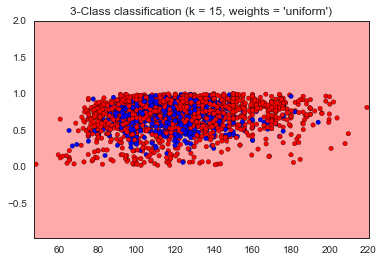

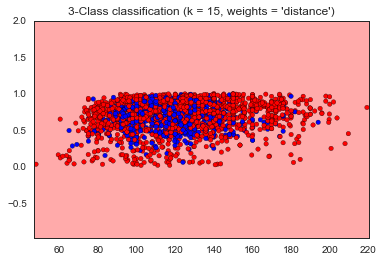

In [132]:
h = .02  # step size in the mesh
n_neighbors = 15
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    knn_class2 = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    knn_class2.fit(X_float, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_float['tempo'].min() - 1, X_float['tempo'].max() + 1
    y_min, y_max = X_float['energy'].min() - 1, X_float['energy'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn_class2.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_float['tempo'], X_float['energy'], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [428]:
log_regr = linear_model.LogisticRegression()
%time log_regr.fit(X_train, y_train)

print('\nCoefficients: \n', log_regr.coef_)
print('\nIntercept: \n', log_regr.intercept_)
print('\nR-squared:')
print(log_regr.score(X_test, y_test))
print(1 - (1-log_regr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Wall time: 19 ms

Coefficients: 
 [[  2.21821871e-04  -1.92644476e-04   6.50699669e-03  -5.46262986e-04
    1.42868213e-04  -6.64145090e-04  -3.94120645e-05  -1.67664712e-04
    8.20130649e-04  -7.44710359e-03  -4.79157810e-07   5.30458734e-05]]

Intercept: 
 [ -7.44103170e-05]

R-squared:
0.741050674105
0.739597263483


In [431]:
#sklearn.metrics.precision_score(y_test, log_regr.predict(X_test))
sklearn.metrics.recall_score(y_test, log_regr.predict(X_test))

0.0

In [429]:
log_regr.fit(X_train, y_train)
%time log_regr.predict(X_test)

Wall time: 500 µs


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [430]:
log_regr_f1 = sklearn.metrics.f1_score(y_test, log_regr.predict(X_test) )

C:\Users\spenser\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
feature_importance = linear_model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

AttributeError: module 'sklearn.linear_model' has no attribute 'feature_importances_'

In [390]:
confusion_matrix(y_test, log_regr.predict(X_test))

array([[1594,    0],
       [ 557,    0]])

In [413]:
np.bincount(log_regr.predict(X_test))

array([2151], dtype=int64)

In [438]:
rfc = ensemble.RandomForestClassifier(n_estimators=100,random_state=1)
%time rfc.fit(X_train, y_train)
%time rfc.predict(X_test)
cross_val_score(rfc, X_test, y_test, cv=5).mean()

Wall time: 1.18 s
Wall time: 52.6 ms


0.76428536660555224

In [417]:
confusion_matrix(y_test,y_pred)

array([[1511,   83],
       [ 272,  285]])

In [418]:
rfc_f1 = sklearn.metrics.f1_score(y_test, rfc.predict(X_test) )
rfc_f1

0.61621621621621614

In [419]:
sklearn.metrics.precision_score(y_test, knn_class.predict(X_test))
#sklearn.metrics.recall_score(y_test, rfc.predict(X_test))

0.34883720930232559

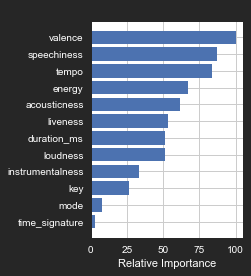

In [420]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [422]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.036881977671451356
Percent Type II errors: 0.08652312599681021

Test set accuracy:
Percent Type I errors: 0.056717805671780565
Percent Type II errors: 0.11622501162250116


In [423]:
%time clf.fit(X_train, y_train)
%time clf.predict(X_test)

Wall time: 1.74 s
Wall time: 14 ms


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [424]:
sklearn.metrics.precision_score(y_test, clf.predict(X_test))
#sklearn.metrics.recall_score(y_test, clf.predict(X_test))

0.71395348837209305

In [425]:
sklearn.metrics.f1_score(y_test, clf.predict(X_test))

0.6220871327254307

In [426]:
clf.score(X_test,y_test)

0.82659228265922824

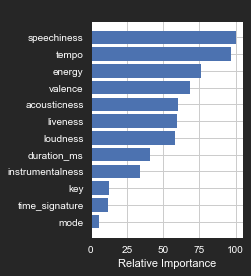

In [410]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [358]:
clf.score(X_test, y_test)

0.82659228265922824

In [359]:
clf_f1 = sklearn.metrics.f1_score(y_test, clf.predict(X_test) )
clf_f1

0.6220871327254307

In [360]:
log_regr = linear_model.LogisticRegression()
knn_class = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10)
rfc = ensemble.RandomForestClassifier(n_estimators=100,random_state=1)
clf = ensemble.GradientBoostingClassifier(n_estimators=500,
          max_depth=2,
          loss='deviance')

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 18 columns):
energy              2117 non-null float64
key                 2117 non-null float64
loudness            2117 non-null float64
mode                2117 non-null float64
speechiness         2117 non-null float64
acousticness        2117 non-null float64
instrumentalness    2117 non-null float64
liveness            2117 non-null float64
valence             2117 non-null float64
tempo               2117 non-null float64
duration_ms         2117 non-null float64
time_signature      2117 non-null float64
drake               2117 non-null bool
feat                2117 non-null bool
remix               2117 non-null bool
love                2117 non-null bool
dont                2117 non-null bool
like                2117 non-null bool
dtypes: bool(6), float64(12)
memory usage: 307.4 KB


In [272]:
rfc = ensemble.RandomForestClassifier(n_estimators=100,random_state=1)
knn_class = sklearn.neighbors.KNeighborsClassifier(n_neighbors=15)
log_regr = linear_model.LogisticRegression()
clf = ensemble.GradientBoostingClassifier(**params)
eclf = EnsembleVoteClassifier(clfs=[clf, log_regr, knn_class, rfc],
                              weights=[2, 1,1,1], voting='soft')

In [ ]:
sklearn.metrics.precision_score(y_test, eclf.predict(X_test))
sklearn.metrics.recall_score(y_test, eclf.predict(X_test))

In [395]:
# Plotting Decision Regions



%time eclf.fit(X_train, y_train)
eclf.score(X_test,y_test)
    

Wall time: 2.84 s


0.802882380288238

In [394]:
%time eclf.predict(X_test)

Wall time: 111 ms


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [396]:
sklearn.metrics.precision_score(y_test, eclf.predict(X_test))

0.8308457711442786

In [397]:
sklearn.metrics.f1_score(y_test, eclf.predict(X_test))

0.4406332453825858

In [398]:
sklearn.metrics.recall_score(y_test, eclf.predict(X_test))

0.29982046678635549

In [ ]:
confusion_matrix(eclf)

In [183]:
pca = PCA(n_components=2)
pca.fit(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [  9.99999886e-01   1.09681040e-07   2.11202579e-09]


In [179]:
X_trans = pca.fit_transform(X)


In [180]:
X_trans_train, X_trans_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3)

In [181]:
rfc = ensemble.RandomForestClassifier(n_estimators=100,random_state=1)
knn_class = sklearn.neighbors.KNeighborsClassifier(n_neighbors=15)
log_regr = linear_model.LogisticRegression()
clf = ensemble.GradientBoostingClassifier(**params)
eclf_pca = EnsembleVoteClassifier(clfs=[clf, log_regr, knn_class, rfc],
                              weights=[2, 1,1,1], voting='soft')

In [182]:
eclf_pca.fit(X_trans_train, y_train)
eclf_pca.score(X_trans_test,y_test)

0.63836477987421381

In [168]:
components = sklearn_pca.components_
components


array([[ -3.64587833e-07,   9.96755515e-07,  -1.27360767e-05,
         -4.19095984e-07,  -8.85769272e-08,   2.29507788e-07,
          1.02886394e-06,   5.03367789e-08,  -3.67237915e-07,
         -2.42445834e-05,   1.00000000e+00,  -1.31159078e-07,
         -3.48521801e-09,  -1.38945048e-07,   1.51206858e-07,
          1.31880976e-08,   2.07418009e-08,  -6.34092146e-08],
       [  1.18994967e-03,   5.59727084e-03,   1.78559327e-02,
         -1.04670307e-03,   3.67000629e-04,  -1.22201425e-03,
          2.50454155e-04,   8.54891980e-05,  -3.28169485e-04,
          9.99822562e-01,   2.44619358e-05,  -5.24011406e-04,
          3.00248587e-05,   4.10791800e-05,   2.91039523e-04,
          5.80487801e-07,  -2.01523125e-05,  -4.66764492e-06],
       [ -2.27630582e-02,  -8.68411937e-01,  -4.93677882e-01,
          2.56485939e-02,  -9.16913452e-04,   2.23526647e-02,
          1.11143196e-02,  -4.82962321e-03,  -7.96880075e-03,
          1.37523385e-02,  -5.10648230e-06,  -6.25354813e-03,
      

In [161]:
sklearn_pca.singul


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
sns.set_style("whitegrid")

In [377]:
sns.set_style({'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white',
                'xtick.major.size': 0.5,
                'xtick.minor.size': 0.5,
                'axes.edgecolor': '.15',
                'axes.facecolor': 'white',
               'figure.facecolor': '.15',
                
})

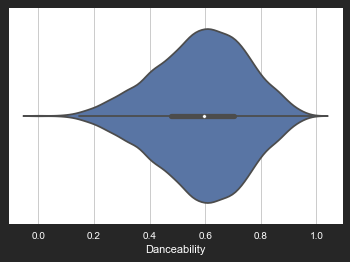

In [378]:
sns.violinplot(x=df.danceability)
plt.xlabel('Danceability')
plt.show()

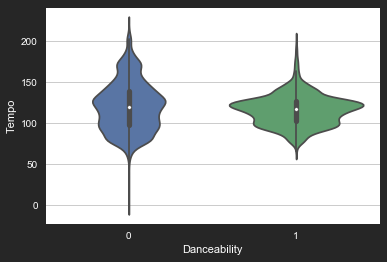

In [379]:
sns.violinplot(x='danceBin',y='tempo', data=df)
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.show()

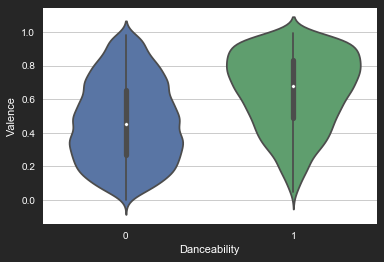

In [381]:
sns.violinplot(x='danceBin',y='valence', data=df)
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.show()

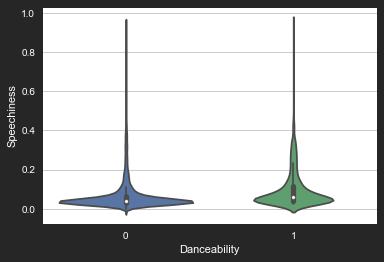

In [382]:
sns.violinplot(x='danceBin',y='speechiness', data=df)
plt.xlabel('Danceability')
plt.ylabel('Speechiness')
plt.show()

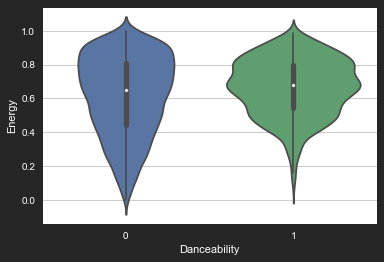

In [384]:
sns.violinplot(x='danceBin',y='energy', data=df)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 36 columns):
id                  100 non-null object
name                2117 non-null object
artists             2117 non-null object
danceability        2117 non-null float64
energy              2117 non-null float64
key                 2117 non-null float64
loudness            2117 non-null float64
mode                2117 non-null float64
speechiness         2117 non-null float64
acousticness        2117 non-null float64
instrumentalness    2117 non-null float64
liveness            2117 non-null float64
valence             2117 non-null float64
tempo               2117 non-null float64
duration_ms         2117 non-null float64
time_signature      2117 non-null float64
danceBin            2117 non-null int64
the                 2117 non-null bool
&                   2117 non-null bool
drake               2117 non-null bool
of                  2117 non-null bool
dj                  2117 non-

In [23]:
sns.axes_style({'text.color': '1'})

{'text.color': '1'}

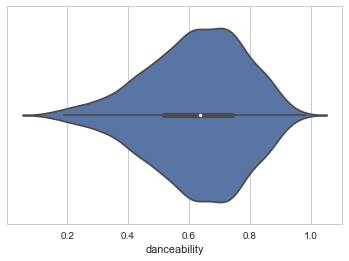

In [24]:
sns.violinplot(x=df['danceability'])

In [104]:
df.sort_values('tempo', ascending=False)

id                                   name  \
99  1j4kHkkpqZRBwE0A4CN4Y             dusk till dawn  radio edit   
61  3umS4y3uQDkqekNjVpiRU                              el amante   
66  5hYTyyh2odQKphUbMqc5g             how far ill go  from moana   
2   4aWmUDTfIPGksMNLV2rQP       despacito featuring daddy yankee   
21  0tKcYR2II1VCQWT79i5Nr                                thunder   
58  3kxfsdsCpFgN412fpnW85                                redbone   
96  0QsvXIfqM0zZoerQfsI9l                       dont let me down   
37  7wGoVu4Dady5GV0Sv4UIs                               rockstar   
83  4pLwZjInHj3SimIyN9SnO                           side to side   
10  7GX5flRQZVHRAGd6B4TmD                          xo tour llif3   
14  0VgkVdmE4gld66l8iyGjg                               mask off   
5   7KXjTSCq5nL1LoYtL7XAw                                 humble   
89  4b4KcovePX8Ke2cLIQTLM                              all night   
39  3A7qX2QjDlPnazUsRk5y0                  2u feat justin bieber   
57  3m660poUr1chesgkkjQM7                        sorry not sorry   
92  22eADXu8DfOAUEDw4vU8q                             ahora dice   
75  7vGuf3Y35N4wmASOKLUVV                                silence   
79  0CokSRCu5hZgPxcZBaEzV              glorious feat skylar grey   
88  1UZOjK1BwmwWU14Erba9C                                 malibu   
60  6HZILIRieu8S0iqY8kIKh                                    dna   
27  3ebXMykcMXOcLeJ9xZ17X                    scared to be lonely   
95  1PSBzsahR2AKwLJgx8ehB         bad things with camila cabello   
72  5Z3GHaZ6ec9bsiI5Benrb                      young dumb  broke   
17  6PCUP3dWmTjcTtXY02oFd                     castle on the hill   
8   0KKkJNfGyhkQ5aFogxQAP                      thats what i like   
51  343YBumqHu19cGoGARUTs                              fake love   
86  04DwTuZ2VBdJCCC5TROn7                    in the name of love   
71  6gBFPUFcJLzWGx4lenP6h                             goosebumps   
78  6uFsE1JgZ20EXyU0JQZbU               look what you made me do   
48  4Km5HrUvYTaSUfiSGPJeQ       bad and boujee feat lil uzi vert   
..                    ...                                    ...   
6   3eR23VReFzcdmS7TYCrhC           it aint me with selena gomez   
26  0afhq8XCExXpqazXczTSv                            galway girl   
80  6875MeXyCW0wLyT72Eetm                               starving   
74  21TdkDRXuAB3k90ujRU1e                       cold feat future   
97  7mldq42yDuxiUNn08nvzH                  body like a back road   
16  6kex4EBAj0WHXDKZMEJaa  swalla feat nicki minaj  ty dolla ign   
7   3B54sVLJ402zGa6Xm4YGN                          unforgettable   
32  1OAh8uOEOvTDqkKFsKksC                          wild thoughts   
84  3QwBODjSEzelZyVjxPOHd                 otra vez feat j balvin   
63  6520aj0B4FSKGVuKNsOCO                  chained to the rhythm   
0   7qiZfU4dY1lWllzX7mPBI                           shape of you   
40  0tgVpDi06FyKpA1z0VMD4                                perfect   
28  7BKLCZ1jbUBVqRi2FVlTV                                 closer   
31  5aAx2yezTd8zXrkmtKl66                                starboy   
81  3AEZUABDXNtecAOSC1qTf               reggaetón lento bailemos   
44  0qYTZCo5Bwh1nsUFGZP3z                          felices los 4   
30  5GXAXm5YOmYT0kL5jHvYB                       i feel it coming   
87  6DNtNfH8hXkqOX1sjqmI7      cold water feat justin bieber  mø   
68  2cnKEkpVUSV4wnjQiTWfH                       escápate conmigo   
85  1wjzFQodRWrPcQ0AnYnvQ                       i like me better   
76  1mXVgsBdtIVeCLJnSnmtd                   too good at goodbyes   
55  7nKBxz47S9SD79N086fuh                        subeme la radio   
1   5CtI0qwDJkDQGwXD1H1cL                       despacito  remix   
67  38yBBH2jacvDxrznF7h08                             slow hands   
22  5uCax9HTNlzGybIStD3vD                    say you wont let go   
69  0SGkqnVQo9KPytSri1H6c                            bounce back   
4   3DXncPQOG4VBw3QHh3S81                             im the one   
46  152lZdx

In [101]:
df['tempo'][31] = 94

C:\Users\spenser\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
df2 = pd.read_csv('spotify2.csv')

In [77]:
df2.drop(['Unnamed: 0','target'], axis=1, inplace=True)

In [78]:
df2 = df2.rename(index=str, columns={'song_title':'name','artist':'artists'})

In [244]:
df2

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0         0.010200         0.833       204600  0.4340          0.021900    2   
1         0.199000         0.743       326933  0.3590          0.006110    1   
2         0.034400         0.838       185707  0.4120          0.000234    2   
3         0.604000         0.494       199413  0.3380          0.510000    5   
4         0.180000         0.678       392893  0.5610          0.512000    5   
5         0.004790         0.804       251333  0.5600          0.000000    8   
6         0.014500         0.739       241400  0.4720          0.000007    1   
7         0.020200         0.266       349667  0.3480          0.664000   10   
8         0.048100         0.603       202853  0.9440          0.000000   11   
9         0.002080         0.836       226840  0.6030          0.000000    7   
10        0.057200         0.525       358187  0.8550          0.014300    5   
11        0.091500         0.753       324880  0.7480          0.003480   10   
12        0.253000         0.603       356973  0.4340          0.061900    0   
13        0.366000         0.762       243270  0.4760          0.000000    0   
14        0.440000         0.662       247288  0.6030          0.000000    9   
15        0.019000         0.637       188333  0.8320          0.056300    6   
16        0.023900         0.603       270827  0.9550          0.045100    1   
17        0.233000         0.789       447907  0.6590          0.000490    4   
18        0.314000         0.713       195429  0.6110          0.000000    1   
19        0.024200         0.735       214347  0.7590          0.185000    1   
20        0.000702         0.854       249253  0.7190          0.308000   10   
21        0.000240         0.747       307680  0.7400          0.369000    1   
22        0.118000         0.854       287086  0.4010          0.000000    9   
23        0.000596         0.224       132760  0.9250          0.000001   11   
24        0.279000         0.512       203400  0.5640          0.000015   10   
25        0.002190         0.781       205160  0.7950          0.269000    7   
26        0.341000         0.411       199500  0.6840          0.000001   11   
27        0.018000         0.646       188333  0.8370          0.040300    6   
28        0.051600         0.782       228562  0.5720          0.000000    4   
29        0.282000         0.735       186096  0.4000          0.125000    1   
30        0.007910         0.450       220934  0.4490          0.000000    2   
31        0.021900         0.897       285240  0.6420          0.000001    2   
32        0.035800         0.959       213000  0.5980          0.000000    8   
33        0.032400         0.742       280831  0.5590          0.000000    5   
34        0.118000         0.805       232880  0.6870          0.000000    9   
35        0.042800         0.667       230693  0.5810          0.000000    0   
36        0.297000         0.722       175613  0.8230          0.000000    7   
37        0.056500         0.853       205879  0.5470          0.000000    1   
38        0.012800         0.747       213507  0.7050          0.000000    9   
39        0.135000         0.777       237187  0.5910          0.000055    1   
40        0.000410         0.731       324541  0.8520          0.625000   11   
41        0.003560         0.760       186122  0.4020          0.000000    8   
42        0.001560         0.624       183000  0.7920          0.000002   10   
43        0.002430         0.621       378893  0.6830          0.008560   11   
44        0.533000         0.640       234526  0.8190          0.000000    7   
45        0.006310         0.715       213093  0.8330          0.000000    2   
46        0.001820         0.700       386160  0.7560          0.711000    2   
47        0.092300         0.789       175240  0.4940          0.000408    1   
48        0.375000         0.796       252547  0.8600          0.004570    5   
49    

In [191]:
df = df.merge(df2, df3, how='outer')

TypeError: merge() got multiple values for argument 'how'

In [252]:
df.shape


(2017, 15)

In [328]:
df = pd.concat([df, df2, df3])

In [329]:
df

acousticness                        artists  danceability  duration_ms  \
0         0.581000                     Ed Sheeran        0.8250     233713.0   
1         0.229000                     Luis Fonsi        0.6940     228827.0   
2         0.209000                     Luis Fonsi        0.6600     228200.0   
3         0.049800               The Chainsmokers        0.6170     247160.0   
4         0.055200                      DJ Khaled        0.6090     288600.0   
5         0.000259                 Kendrick Lamar        0.9040     177000.0   
6         0.119000                           Kygo        0.6400     220781.0   
7         0.029300                 French Montana        0.7260     233902.0   
8         0.013000                     Bruno Mars        0.8530     206693.0   
9         0.063100                           ZAYN        0.7350     245200.0   
10        0.002640                   Lil Uzi Vert        0.7320     182707.0   
11        0.021500               The Chainsmokers        0.6530     221507.0   
12        0.232000                           Zedd        0.6790     210091.0   
13        0.096900                   Charlie Puth        0.7740     211475.0   
14        0.010200                         Future        0.8330     204600.0   
15        0.198000                    Post Malone        0.6270     220293.0   
16        0.075000                   Jason Derulo        0.6960     216409.0   
17        0.023200                     Ed Sheeran        0.4610     261154.0   
18        0.406000                   Clean Bandit        0.7200     251088.0   
19        0.052400                Imagine Dragons        0.7790     204347.0   
20        0.014800                       J Balvin        0.5430     189440.0   
21        0.006830                Imagine Dragons        0.6000     187147.0   
22        0.695000                   James Arthur        0.3580     211467.0   
23        0.381000                   Shawn Mendes        0.8570     199440.0   
24        0.023100                    Danny Ocean        0.7440     205715.0   
25        0.413000                 Julia Michaels        0.7060     176320.0   
26        0.073500                     Ed Sheeran        0.6240     170827.0   
27        0.089500                  Martin Garrix        0.5840     220883.0   
28        0.414000               The Chainsmokers        0.7480     244960.0   
29        0.259000                   Clean Bandit        0.7070     212459.0   
30        0.427000                     The Weeknd        0.7680     269187.0   
31        0.165000                     The Weeknd        0.6810     230453.0   
32        0.032900                      DJ Khaled        0.6710     204173.0   
33        0.498000                  Calvin Harris        0.7360     230813.0   
34        0.002560                       Dua Lipa        0.7710     208827.0   
35        0.570000                          Logic        0.6290     250173.0   
36        0.256000                          Drake        0.8090     298941.0   
37        0.130000                    Post Malone        0.5770     218320.0   
38        0.246000                     Liam Payne        0.8690     204502.0   
39        0.219000                   David Guetta        0.5480     194897.0   
40        0.163000                     Ed Sheeran        0.5990     263400.0   
41        0.062300                        Starley        0.6760     222041.0   
42        0.064200                  Calvin Harris        0.8930     223413.0   
43        0.110000                     Jonas Blue        0.7460     181615.0   
44        0.231000                         Maluma        0.7550     229849.0   
45        0.378000                           KYLE        0.7460     253107.0   
46        0.330000                         Khalid        0.7360     219080.0   
47        0.187000                        Shakira        0.8520     195840.0   
48        0.061000                          Migos        0.9270     343150.0   
49    

In [326]:
df3 = pd.read_table('spotify4.txt', sep = '|')

In [327]:
df3

artists   energy  liveness    tempo  speechiness  acousticness  \
0         The Beatles  0.54000    0.1790  129.171       0.0347      0.033900   
1         The Beatles  0.12700    0.0573   93.699       0.0342      0.754000   
2         The Beatles  0.65400    0.1720  115.000       0.0317      0.020500   
3         The Beatles  0.37600    0.0926  165.007       0.0393      0.030200   
4         The Beatles  0.84900    0.0414  124.631       0.0452      0.641000   
5         The Beatles  0.60700    0.0880  147.207       0.0261      0.011200   
6         The Beatles  0.72800    0.2510  113.059       0.0314      0.232000   
7         The Beatles  0.40300    0.1110  143.462       0.0322      0.631000   
8         The Beatles  0.96900    0.0608  142.489       0.0854      0.069000   
9         The Beatles  0.52900    0.1080  150.721       0.0436      0.160000   
10        The Beatles  0.83400    0.2410  121.380       0.2080      0.073400   
11        The Beatles  0.32500    0.1390   65.090       0.0283      0.046900   
12        The Beatles  0.45700    0.9220  163.219       0.0675      0.290000   
13        The Beatles  0.83100    0.8110  167.518       0.0894      0.000606   
14        The Beatles  0.38700    0.0822  103.110       0.0262      0.742000   
15        The Beatles  0.41200    0.0702  152.126       0.0287      0.361000   
16        The Beatles  0.17900    0.0886   96.529       0.0326      0.879000   
17        The Beatles  0.71500    0.3110  130.726       0.0476      0.386000   
18        The Beatles  0.56300    0.3430   77.560       0.0298      0.207000   
19        The Beatles  0.43500    0.1130  103.239       0.0323      0.449000   
20        The Beatles  0.36300    0.2430   79.456       0.0315      0.333000   
21        The Beatles  0.54000    0.1690  139.288       0.0589      0.523000   
22        The Beatles  0.55600    0.5890   85.206       0.0513      0.082800   
23        The Beatles  0.32100    0.1210  118.045       0.0340      0.854000   
24        The Beatles  0.33800    0.1380  133.522       0.0304      0.198000   
25        The Beatles  0.33800    0.1050  122.421       0.0454      0.790000   
26        The Beatles  0.50200    0.0713   97.871       0.1780      0.336000   
27        The Beatles  0.28900    0.0928   77.119       0.0259      0.568000   
28        The Beatles  0.28000    0.3050  137.831       0.0381      0.936000   
29        The Beatles  0.65600    0.2680  173.930       0.0397      0.012600   
30        The Beatles  0.48300    0.5390   68.492       0.1750      0.656000   
31        The Beatles  0.59300    0.2120   82.246       0.0324      0.004290   
32              Queen  0.59300    0.2120   82.246       0.0324      0.004290   
33        The Beatles  0.78200    0.1250  137.453       0.0307      0.120000   
34        The Beatles  0.29200    0.1280  177.624       0.0321      0.872000   
35        The Beatles  0.51500    0.3890  112.035       0.0337      0.365000   
36        The Beatles  0.36900    0.1120  176.625       0.0379      0.183000   
37        The Beatles  0.48700    0.1380  123.444       0.0689      0.001010   
38        The Beatles  0.09530    0.1170  134.706       0.0304      0.828000   
39        The Beatles  0.38800    0.2670   77.643       0.0337      0.525000   
40        The Beatles  0.72500    0.0994   95.003       0.0332      0.188000   
41        The Beatles  0.58300    0.1190  138.134       0.0380      0.412000   
42        The Beatles  0.67300    0.7970   95.513       0.0734      0.085700   
43        The Beatles  0.15200    0.1130   80.608       0.0277      0.326000   
44        The Beatles  0.91600    0.0740   75.533       0.0481      0.260000   
45        The Beatles  0.62600    0.6210   98.425       0.0377      0.078500   
46        The Beatles  0.67300    0.2060  133.117       0.0318      0.284000   
47        The Beatles  0.72000    0.3140   80.652       0.0338      0.003760   
48        The Beatles  0.67700    0.1830  106.071       0.0298      0.063500   
49        The 

In [412]:
df.sort_values('tempo')

acousticness                                     artists  danceability  \
3687      0.908000                                      R.E.M.        0.0000   
3412      0.963000                                        Pink        0.0000   
3677      0.865000                                      R.E.M.        0.0000   
359       0.678000                                  Pink Floyd        0.1830   
3469      0.866000                              The Carpenters        0.2080   
4448      0.213000                                     Kenny G        0.2610   
1531      0.940000                                Bill Charlap        0.3170   
1421      0.008610                                    Bee Gees        0.2150   
1654      0.295000                                       Adele        0.4640   
2190      0.370000                                Neil Diamond        0.1260   
3486      0.962000                              The Carpenters        0.1360   
803       0.781000                                Garth Brooks        0.1550   
3700      0.905000                                      R.E.M.        0.3810   
4432      0.363000                                     Kenny G        0.3860   
1532      0.946000                          Stanley Turrentine        0.5050   
4260      0.937000                             Johnny Hallyday        0.4800   
4886      0.480000                                  The Police        0.5150   
880       0.946000                                      Eagles        0.2280   
906       0.946000                                      Eagles        0.2280   
4385      0.571000                                    Maroon 5        0.6010   
1406      0.503000                                        Cobi        0.4100   
1544      0.846000                                 McCoy Tyner        0.5690   
3532      0.503000                               Lionel Richie        0.4130   
1562      0.901000                                  Lee Morgan        0.3680   
4047      0.495000                              George Michael        0.4450   
592       0.632000                             Whitney Houston        0.4640   
2246      0.990000                                      Prince        0.3330   
3514      0.401000                               Lionel Richie        0.5620   
2189      0.895000                                Neil Diamond        0.2940   
4428      0.111000                                     Kenny G        0.1600   
1204      0.794000                            Barbra Streisand        0.5060   
2177      0.589000                                Neil Diamond        0.5380   
1878      0.381000                                     Beyoncé        0.3030   
2340      0.827000                              Paul McCartney        0.4160   
3324      0.469000                                Shania Twain        0.6280   
3325      0.469000                                Shania Twain        0.6280   
1542      0.924000                                Beegie Adair        0.5330   
4334      0.872000                                     Journey        0.4180   
1549      0.971000                                  Hank Jones        0.4500   
4631      0.987000                                        Enya        0.3210   
1576      0.978000                              Duke Ellington        0.5140   
474       0.030500                                       Trina        0.8740   
1512      0.920000                             David Hazeltine        0.4420   
1554      0.054400                               Justin Bieber        0.6560   
11        0.046900                                 The Beatles        0.3110   
1561      0.903000                             Christian Scott        0.2570   
1564      0.978000                                  Art Pepper        0.5750   
4222      0.105000                             Johnny Hallyday        0.3330   
97        0.918000                               Elvis Presley        0.3550   
1900  

In [441]:
df.tempo.mean()

119.91629468396825

In [442]:
df.sort_values('danceability', ascending=False)

acousticness                             artists  danceability  \
1433      0.001210                        Ben Remember        0.9840   
1901      0.058400                   Justin Timberlake        0.9670   
867       0.055600                              Eminem        0.9620   
604       0.014000                           Blaqstarr        0.9620   
32        0.035800                          Young Thug        0.9590   
1957      0.033600                         Vanilla Ice        0.9590   
3461      0.053000                             Santana        0.9580   
4309      0.014900                 The Black Eyed Peas        0.9530   
4293      0.051200                 The Black Eyed Peas        0.9520   
529       0.115000                               Queen        0.9510   
833       0.033900                              Eminem        0.9500   
1136      0.177000                        Selena Gomez        0.9500   
1977      0.070700                          StaRR Lyfe        0.9470   
3436      0.022000                             Santana        0.9470   
138       0.009190                       Three 6 Mafia        0.9440   
3396      0.038600                                Pink        0.9440   
623       0.041500                            2 Chainz        0.9410   
4810      0.148000                          Bob Marley        0.9410   
1591      0.741000                         Tumble Tots        0.9410   
4834      0.153000                          Bob Marley        0.9390   
4853      0.128000                          Bob Marley        0.9390   
4828      0.004990                          Bob Marley        0.9390   
856       0.292000                              Eminem        0.9370   
4823      0.138000                          Bob Marley        0.9370   
592       0.004020                             Juicy J        0.9370   
865       0.087900                              Eminem        0.9370   
4836      0.100000                          Bob Marley        0.9360   
4876      0.063100                          The Police        0.9340   
260       0.018100                       Missy Elliott        0.9320   
124       0.017400                     Michael Jackson        0.9320   
4809      0.143000                          Bob Marley        0.9320   
4374      0.479000                            Maroon 5        0.9320   
582       0.002070                              Lunice        0.9310   
651       0.061300                           Finatticz        0.9310   
901       0.028900                            Claptone        0.9300   
827       0.003480                              Eminem        0.9290   
4825      0.172000                          Bob Marley        0.9280   
48        0.061000                               Migos        0.9270   
1954      0.422000                         Los Del Rio        0.9270   
51        0.108000                               Drake        0.9270   
1900      0.350000                        Gwen Stefani        0.9260   
1914      0.079500                           Lil Wayne        0.9250   
4808      0.363000                          Bob Marley        0.9230   
4513      0.046600                        Tupac Shakur        0.9210   
1316      0.212000                          Kanye West        0.9210   
1735      0.010300                               Jay-Z        0.9200   
1827      0.023600                     Michael Jackson        0.9200   
101       0.023600                     Michael Jackson        0.9200   
1297      0.088600                          Kanye West        0.9190   
4285      0.080100                 The Black Eyed Peas        0.9190   
366       0.001940                             Rihanna        0.9190   
4843      0.018600                          Bob Marley        0.9180   
3715      0.092800                            Flo Rida        0.9180   
205       0.337000                          Elton John        0.9170   
4829      0.359000                          Bo

In [445]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X_train, y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Not Danceable','Danceable'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [450]:
df[df['danceability']==1].sort_values('tempo')

Empty DataFrame
Columns: [acousticness, artists, danceability, duration_ms, energy, id, instrumentalness, key, liveness, loudness, mode, name, speechiness, tempo, time_signature, type, uri, valence, danceBin, the, boys, jackson, michael, taylor, johnny, george, bob, barry]
Index: []